In [1]:
import pandas as pd #'version 1.2.4'
import numpy as np #'version 1.21.0'
from basico import * #'version 0.36'
import os
import random
import matplotlib.pyplot as plt #'version 3.3.4'
import seaborn as sns #'version 0.11.1'
from itertools import permutations


In [115]:
# define parallelization cores
groups = 500
par_cores = 525

In [116]:
# generate all possible permutations of the virus.
perms = list(permutations([1,.7,.49,.343, .0343]))
genes = ["N", "P", "M", "G", "L"]


In [117]:
# function for sorting one list based on another list
def sort_list(list1, list2):
    zipped_pairs = zip(list2, list1)
    z = [x for _, x in sorted(zipped_pairs)]
    return z

In [118]:
# sort genes based on transcription rate and then join together to get the variant name
gene_perms = ["".join(sort_list(genes, perms[i])[::-1]) for i in range(len(perms))]


In [119]:
# define the model names
path = !pwd
path = path[0] + "/"
base_model =  path + "NPMGL_Model_SSA.xml"
mod = load_model(base_model)
set_current_model(mod)
reactions  = np.array(get_reaction_parameters()["reaction"])

# get the transcription reaction names so they can be altered as a unit
tran_N = reactions[["transcription_N" in x for x in reactions]]
tran_P = reactions[["transcription_P" in x for x in reactions]]
tran_M = reactions[["transcription_M" in x for x in reactions]]
tran_G = reactions[["transcription_G" in x for x in reactions]]
tran_L = reactions[["transcription_L" in x for x in reactions]]

rxns = [tran_N, tran_P, tran_M, tran_G, tran_L]

In [120]:
# get the actual maximum transcription rate and then multiply the permutations of gene order to be the true transcription rate values
base_rate = float(get_reaction_parameters()[get_reaction_parameters()["reaction"] == "transcription_N_0"]["value"])
tr_perms = np.array(perms ) * base_rate



In [121]:
# name temporary model for parallelizing stochastic simulations
temp_model = path + "temp_model.xml"



In [122]:
# function to be parallelized to get the total dataframe
def get_data(model):
    import basico
    import pandas as pd
    mod = basico.load_model(model)
    basico.set_current_model(mod)
    basico.set_model_unit(quantity_unit= "#")
    res = []
    for j in range(10):
        tc = basico.run_time_course(duration=57000, start_time=0, stepsize=1000, method="DirectMethod")
        tc["Time"] = tc.index
        tc.index = range(len(tc))
        res.append(tc)
    basico.remove_datamodel(mod)
    return pd.concat(res)

In [10]:
# define the number of cores to be used and activate the cluster
# this code is commented because to prevent overloading and crashing computers. This code was run using AWS cloud computing.

#import ipyparallel as ipp # version 8.4.1
#cluster = ipp.Cluster(n=par_cores)
#cluster.start_cluster_sync()
#rc = cluster.connect_client_sync()
#rc.wait_for_engines(par_cores)
#dview = rc[0:par_cores]


Starting 525 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


INFO:ipyparallel.cluster.cluster.1689036913-0y07:Starting 525 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


 91%|#########1| 478/525 [00:00<?, ?engine/s]

In [16]:
# go through every possible gene shuffled variant and simulate the model then add it to the prediction datagrame
preds = []
for perm in tr_perms:
    for i in range(len(rxns)):
        for r in rxns[i]:
            set_reaction(r, mapping={"k1": perm[i]})
    save_model(temp_model)
    sim_list = [temp_model] * groups
    ar_map = dview.map_async(get_data, sim_list)
    ar_map.wait_interactive()
    res = ar_map.get()
    res = pd.concat(res)
    preds.append(res)
    os.remove(temp_model)

column_names = preds[0].columns


get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

In [18]:
# save all data associated with these predictions
np.save("all_possible_variants.npy", np.array(preds))
pd.DataFrame(column_names).T.to_csv("colnames.csv")
np.save("transcription_rates.npy", np.array(tr_perms))
pd.DataFrame(gene_perms).T.to_csv( "gene_perms.csv")


In [123]:
preds = np.load("all_possible_variants.npy")
rates = np.load("transcription_rates.npy")
column_names = pd.read_csv("colnames.csv",index_col=0)
gene_perms = pd.read_csv("gene_perms.csv",index_col=0).T


In [135]:
# get data on number of virions produced and calculate standard deviation and mean. Also get percent of aborted infections
pred_v = preds[:,:,18]
pred_time = preds[:,:,19]
pred_v = pred_v[pred_time == 57000]
pred_v = pred_v.reshape(len(pred_time),int(len(pred_v)/len(pred_time)))
pred_std = np.std(pred_v, axis = 1)
pred_via = (1-(np.sum(pred_v > 1, axis = 1) / len(pred_v[0]) )) * 100
pred_v = np.mean(pred_v, axis = 1)



In [141]:
# save in table of variants
variant_table = pd.concat([ gene_perms.T, pd.DataFrame(pred_v), pd.DataFrame(pred_std), pd.DataFrame(pred_via)], axis = 1)
variant_table.columns  = ["Variant", "Mean Virions Produced", "Standard Deviation", "Percent Aborted Infections"]
variant_table.to_excel("Variant_Table.xlsx")

In [143]:
# find the most fruitful gene shuffled variant
max_vir = pred_v[np.where(pred_v == np.max(pred_v))]
max_var = gene_perms.iloc[:,np.where(pred_v == np.max(pred_v))[0][0]].iloc[0]
max_rates = rates[np.where(pred_v == np.max(pred_v))][0]
max_var



'NMGLP'

In [26]:
# define the scan range for adjusting the transcription rates
scan = np.linspace(-.25, .25, 11)
scan = sort_list(scan, np.abs(scan))[::-1]


In [50]:
# simulate the model with every possible adjustment in every gene
preds_rxns = []
for i in range(len(rxns)):
    rate = max_rates[i]
    preds = []
    for adj in scan:
        for j in range(len(rxns)):
            for r in rxns[j]:
                set_reaction(r, mapping={"k1": max_rates[j]})
        new_rate = rate + rate * adj
        for r in rxns[i]:
            set_reaction(r, mapping={"k1": new_rate})
        save_model(temp_model)
        sim_list = [temp_model] * groups
        ar_map = dview.map_async(get_data, sim_list)
        ar_map.wait_interactive()
        res = ar_map.get()
        res = pd.concat(res)
        preds.append(res)
        os.remove(temp_model)        
    preds_rxns.append(preds)
    
    

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

In [51]:
# save the data
np.save("par_scan_max.npy",np.array(preds_rxns))


/tmp/ipykernel_1728/2017451756.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save("par_scan_max.npy",np.array(preds_rxns))


In [29]:
# select the wildtype parameters
wt_vir = pred_v[0]
wt_var = gene_perms.iloc[:,0][0]
wt_rates = rates[0]
wt_rates



array([1.0046800e-03, 7.0327600e-04, 4.9229320e-04, 3.4460524e-04,
       3.4460524e-05])

In [28]:
# simulate the model with every possible adjustment in every gene
preds_rxns = []
for i in range(len(rxns)):
    rate = wt_rates[i]
    preds = []
    for adj in scan:
        for j in range(len(rxns)):
            for r in rxns[j]:
                set_reaction(r, mapping={"k1": wt_rates[j]})
        new_rate = rate + rate * adj
        for r in rxns[i]:
            set_reaction(r, mapping={"k1": new_rate})
        save_model(temp_model)
        sim_list = [temp_model] * groups
        ar_map = dview.map_async(get_data, sim_list)
        ar_map.wait_interactive()
        res = ar_map.get()
        res = pd.concat(res)
        preds.append(res)
        os.remove(temp_model)        
    preds_rxns.append(preds)
    
    

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

get_data:   0%|          | 0/500 [00:00<?, ?tasks/s]

In [31]:
# save the data
np.save("par_scan_wt.npy",np.array(preds_rxns))


In [68]:
# load best variant parameter scan data in
scan = np.linspace(-.25, .25, 11)
scan = sort_list(scan, np.abs(scan))[::-1]
max_scan = np.load("par_scan_max.npy",allow_pickle =  True)



In [70]:
# get means and 95 percent CI for the parameter scan models
max_means = []
max_95CI = []
for i in range(len(max_scan)):
    means = []
    CI = []
    for j in range(len(max_scan[i])):
        means.append(np.mean(max_scan[i][j][max_scan[i][j]["Time"] == 57000]["V"]))
        CI.append((np.std(max_scan[i][j][max_scan[i][j]["Time"] == 57000]["V"]) * 1.96)/np.sqrt(len(max_scan[i][j][max_scan[i][j]["Time"] == 57000]["V"]))   )
    max_means.append(means)
    max_95CI.append(CI)

In [191]:
# load wildtype parameter scan data in
wt_scan = np.load("par_scan_wt.npy", allow_pickle = True)

In [202]:
# get means and 95 percent CI for the parameter scan models
wt_means = []
wt_95CI = []
for i in range(len(wt_scan)):
    means = []
    CI = []
    for j in range(len(wt_scan[i])):
        means.append(np.mean(wt_scan[i][j][wt_scan[i][j][:,19] == 57000][:,18]))
        CI.append((np.std(wt_scan[i][j][wt_scan[i][j][:,19] == 57000][:,18]) * 1.96)/np.sqrt(len(wt_scan[i][j][wt_scan[i][j][:,19] == 57000][:,18]))   )
    wt_means.append(means)
    wt_95CI.append(CI)

In [2]:
# load data in
preds = np.load("all_possible_variants.npy")
rates = np.load("transcription_rates.npy")
column_names = pd.read_csv("colnames.csv",index_col=0)
gene_perms = pd.read_csv("gene_perms.csv",index_col=0).T


In [3]:
# get average virion production and time for each gene shuffled variant
pred_v = preds[:,:,18].reshape(120,5000,58)
pred_time = preds[:,:,19].reshape(120,5000,58)
pred_v = np.mean(pred_v, axis = 1)
pred_time = np.mean(pred_time, axis = 1)

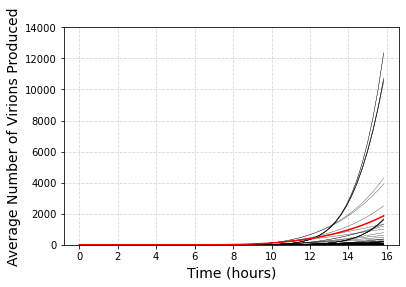

In [5]:
# plot average virion count over time for every gene shuffled variant
for i in range(120):
    plt.plot(pred_time[i]/3600, pred_v[i], color = "black", linewidth=.3)
    plt.ylim(0, 14000)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xlabel("Time (hours)", fontsize=14)
    plt.ylabel("Average Number of Virions Produced", fontsize=14)
plt.plot(pred_time[0]/3600, pred_v[0], color = "red")
plt.savefig(f'VSV_vir_prod.svg', dpi=600, bbox_inches='tight')


In [187]:
print(np.sum(pred_v[:,57] > 1))
print(np.sum(pred_v[:,57] > 1000))
print(np.sum(pred_v[:,57] > 2000))
print(np.sum(pred_v[:,57] > 8000))

6

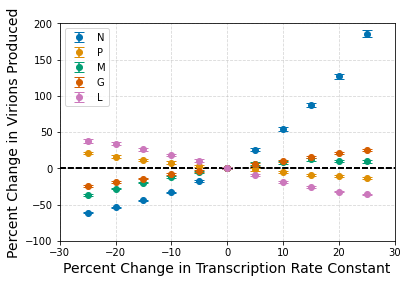

In [105]:
# visualize the parameter scan data
mRNA = ["N", "P", "M", "G", "L"]
colors = sns.color_palette("colorblind", 5)

for i in range(5):
    plt.errorbar(np.array(scan) * 100,(wt_means[i]/wt_vir - 1) * 100 , yerr = (wt_95CI[i]/wt_vir) * 100, fmt="o", label = mRNA[i], color = colors[i],capsize=5)
    plt.ylim(-100,200)
    plt.xlim(-30,30)
    plt.xlabel("Percent Change in Transcription Rate Constant", fontsize=14)
    plt.ylabel("Percent Change in Virions Produced", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.hlines(1, xmin = -30, xmax = 30, linestyle='--', color = "black")
plt.legend()
plt.savefig(f'wt_vsv_parameterscan.svg', dpi=600, bbox_inches='tight')
plt.show()


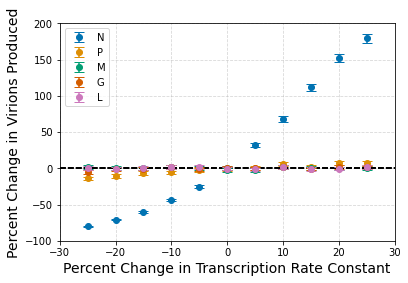

In [104]:
# visualize the parameter scan data

mRNA = ["N", "P", "M", "G", "L"]
colors = sns.color_palette("colorblind", 5)

for i in range(5):
    plt.errorbar(np.array(scan) * 100, (max_means[i]/max_vir - 1) * 100, yerr = ( max_95CI[i]/max_vir) * 100, fmt="o", label = mRNA[i], color = colors[i],capsize=5)
    plt.ylim(-100,200)
    plt.xlim(-30,30)
    plt.xlabel("Percent Change in Transcription Rate Constant", fontsize=14)
    plt.ylabel("Percent Change in Virions Produced", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.hlines(0, xmin = -30, xmax = 30, linestyle='--', color = "black")
plt.legend()
plt.savefig(f'best_vsv_parameterscan.svg', dpi=600, bbox_inches='tight')
plt.show()


In [145]:
# Load in the variant table data
variant_table = pd.read_excel("Variant_Table.xlsx")

In [146]:
variant_table

,Unnamed: 0,Variant,Mean Virions Produced,Standard Deviation,Percent Aborted Infections,Mean/Standard Deviation
0,18,NMGLP,12365.2262,11777.918360,0.16,1.049865
1,20,NGMLP,12355.2344,11534.642061,0.10,1.071142
2,19,NMLGP,10742.4638,9275.012844,0.08,1.158216
3,21,NLMGP,10673.8204,9092.712928,0.08,1.173887
4,22,NGLMP,10629.2652,8462.586475,0.06,1.256030
...,...,...,...,...,...,...
115,117,LMGPN,0.6280,1.066216,91.34,0.588999
116,115,MLGPN,0.6176,1.139724,91.68,0.541886
117,116,GMLPN,0.6144,1.024945,91.04,0.599447
118,118,GLMPN,0.6144,1.087434,91.38,0.565000


In [ ]:
mean_virs = variant_table["Mean Virions Produced"]
viability = variant_table["Percent Aborted Infections"]



<ipython-input-224-5cb416739bf6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1,6), fontsize=10)


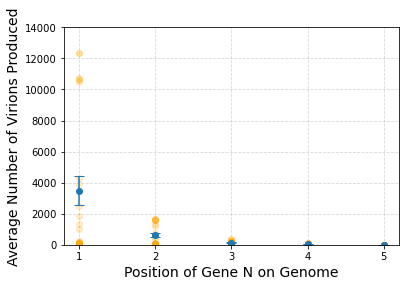

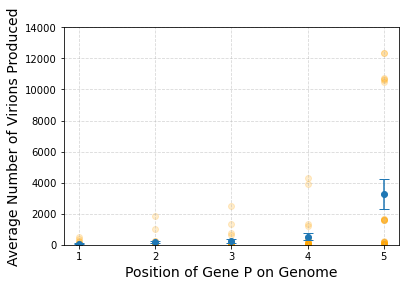

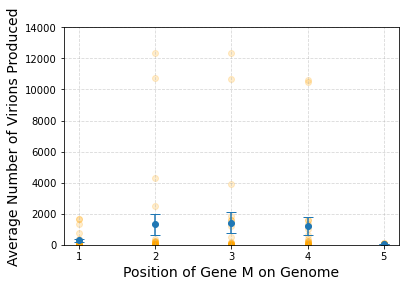

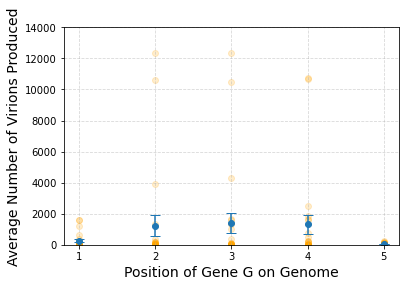

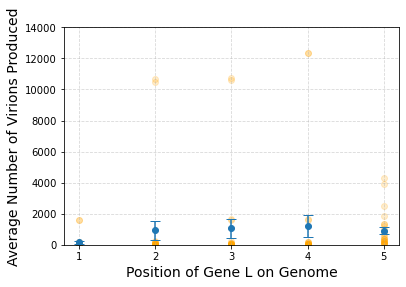

In [224]:
# plot virion production as a function of gene position
mRNA = ["N", "P", "M", "G", "L"]

for i in range(5):
    fig, ax = plt.subplots()
    rs = [np.where(np.array(list(j)) == mRNA[i])[0][0] for j in list(variant_table["Variant"])]
    mean_vir = []
    std_vir = []
    for k in range(5):
        mean_vir.append(np.mean(mean_virs[np.where(np.array(rs) == k)[0]]))
        std_vir.append(np.std(mean_virs[np.where(np.array(rs) == k)[0]]))
    plt.errorbar([0,1,2,3,4],mean_vir, (np.array(std_vir)/np.sqrt(24)), fmt = "o",capsize=5)
    plt.scatter(rs, mean_virs, alpha=.2, color = "orange")
    plt.ylim(0,14000)
    ax.set_xticklabels(range(1,6), fontsize=10)
    plt.xticks([0,1,2,3,4])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xlabel(f"Position of Gene {mRNA[i]} on Genome", fontsize=14)
    plt.ylabel("Average Number of Virions Produced", fontsize=14)
    plt.savefig(f'{mRNA[i]}_dist.svg', dpi=600, bbox_inches='tight')
    plt.show()
    


<ipython-input-227-7f0fdd1a55a7>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1,6), fontsize=10)


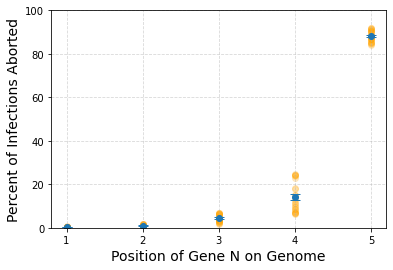

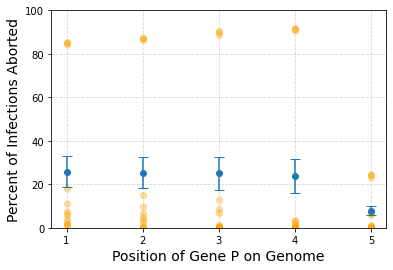

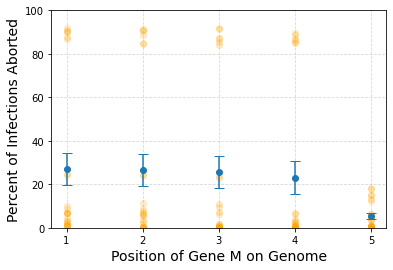

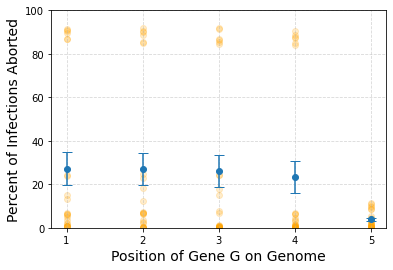

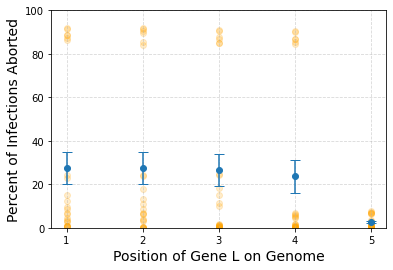

In [227]:
# plot percent of aborted infections as a function of gene position

mRNA = ["N", "P", "M", "G", "L"]

for i in range(5):
    fig, ax = plt.subplots()
    rs = [np.where(np.array(list(j)) == mRNA[i])[0][0] for j in list(variant_table["Variant"])]
    mean_via = []
    std_via = []
    for k in range(5):
        mean_via.append(np.mean(viability[np.where(np.array(rs) == k)[0]]))
        std_via.append(np.std(viability[np.where(np.array(rs) == k)[0]]))
    plt.errorbar([0,1,2,3,4],mean_via, (np.array(std_via)/np.sqrt(24)), fmt = "o",capsize=5)
    plt.scatter(rs, viability, alpha=.2, color = "orange")
    plt.ylim(0,100)
    ax.set_xticklabels(range(1,6), fontsize=10)
    plt.xticks([0,1,2,3,4])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xlabel(f"Position of Gene {mRNA[i]} on Genome", fontsize=14)
    plt.ylabel("Percent of Infections Aborted", fontsize=14)
    plt.savefig(f'{mRNA[i]}_via.svg', dpi=600, bbox_inches='tight')
    plt.show()
    
